In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import sparse
from scipy.sparse import linalg as spla
import spectral

## Multi-dimensional problems

Let's make a 2D function.

In [2]:
x_basis = spectral.Fourier(64)
y_basis = spectral.Fourier(64)
domain = spectral.Domain([x_basis, y_basis])
u = spectral.Field(domain)
x, y = domain.grids()
xm, ym = np.meshgrid(x.ravel(), y.ravel())

In [3]:
u.require_grid_space()
u.data = np.sin(x)*np.cos(y)

<IPython.core.display.Javascript object>


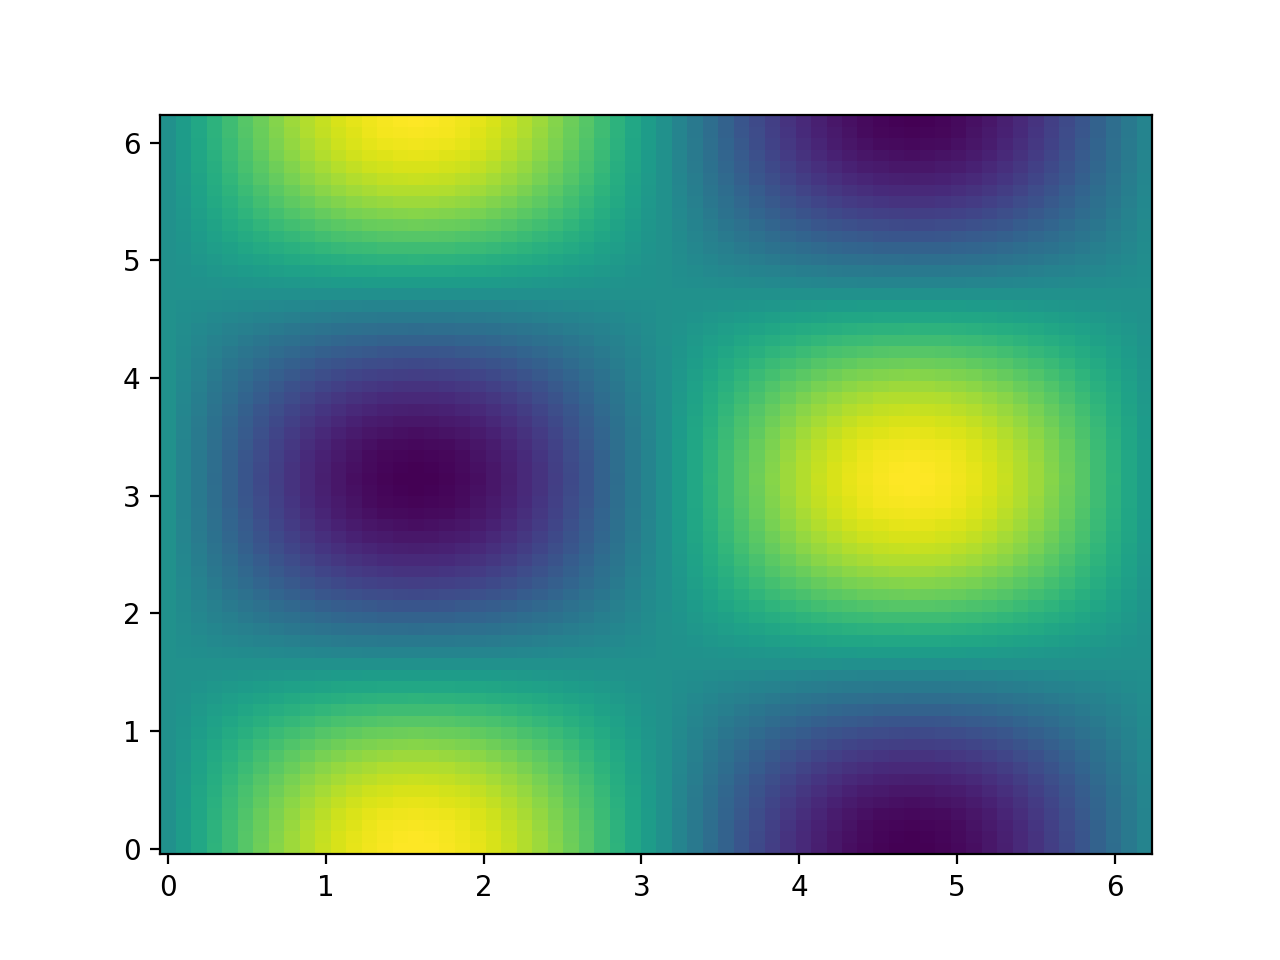

In [4]:
plt.figure()
plt.pcolormesh(xm, ym, u.data.T)

In [5]:
u.towards_coeff_space()

In [6]:
u.coeff

array([ True, False])

<IPython.core.display.Javascript object>


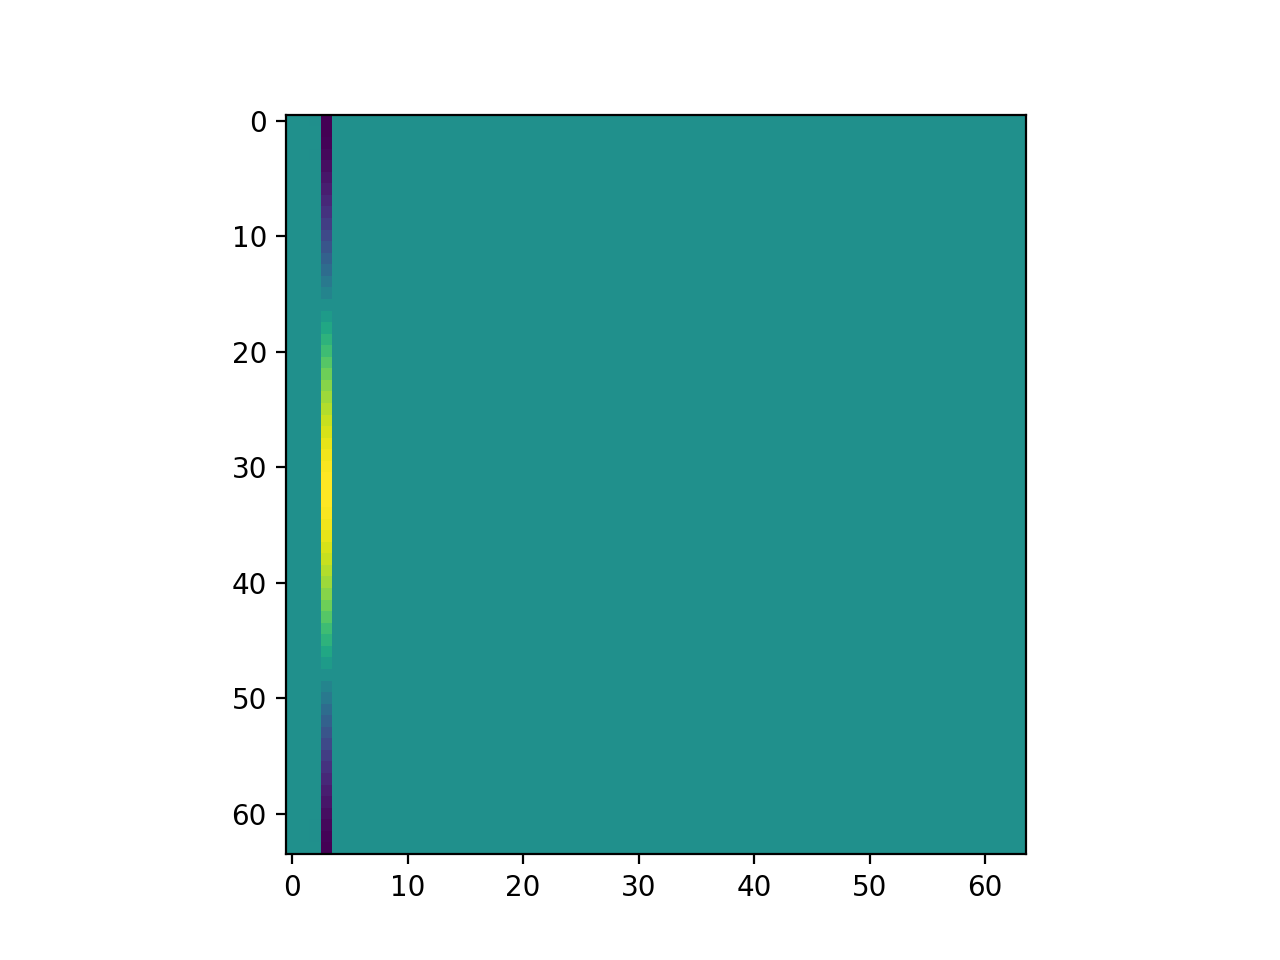

In [7]:
plt.figure()
plt.imshow(u.data.T)

In [8]:
u.data[3]

array([-1.00000000e+00, -9.95184727e-01, -9.80785280e-01, -9.56940336e-01,
       -9.23879533e-01, -8.81921264e-01, -8.31469612e-01, -7.73010453e-01,
       -7.07106781e-01, -6.34393284e-01, -5.55570233e-01, -4.71396737e-01,
       -3.82683432e-01, -2.90284677e-01, -1.95090322e-01, -9.80171403e-02,
       -6.12323400e-17,  9.80171403e-02,  1.95090322e-01,  2.90284677e-01,
        3.82683432e-01,  4.71396737e-01,  5.55570233e-01,  6.34393284e-01,
        7.07106781e-01,  7.73010453e-01,  8.31469612e-01,  8.81921264e-01,
        9.23879533e-01,  9.56940336e-01,  9.80785280e-01,  9.95184727e-01,
        1.00000000e+00,  9.95184727e-01,  9.80785280e-01,  9.56940336e-01,
        9.23879533e-01,  8.81921264e-01,  8.31469612e-01,  7.73010453e-01,
        7.07106781e-01,  6.34393284e-01,  5.55570233e-01,  4.71396737e-01,
        3.82683432e-01,  2.90284677e-01,  1.95090322e-01,  9.80171403e-02,
        1.83697020e-16, -9.80171403e-02, -1.95090322e-01, -2.90284677e-01,
       -3.82683432e-01, -

In [9]:
u.towards_coeff_space()

In [10]:
u.coeff

array([ True,  True])

<IPython.core.display.Javascript object>


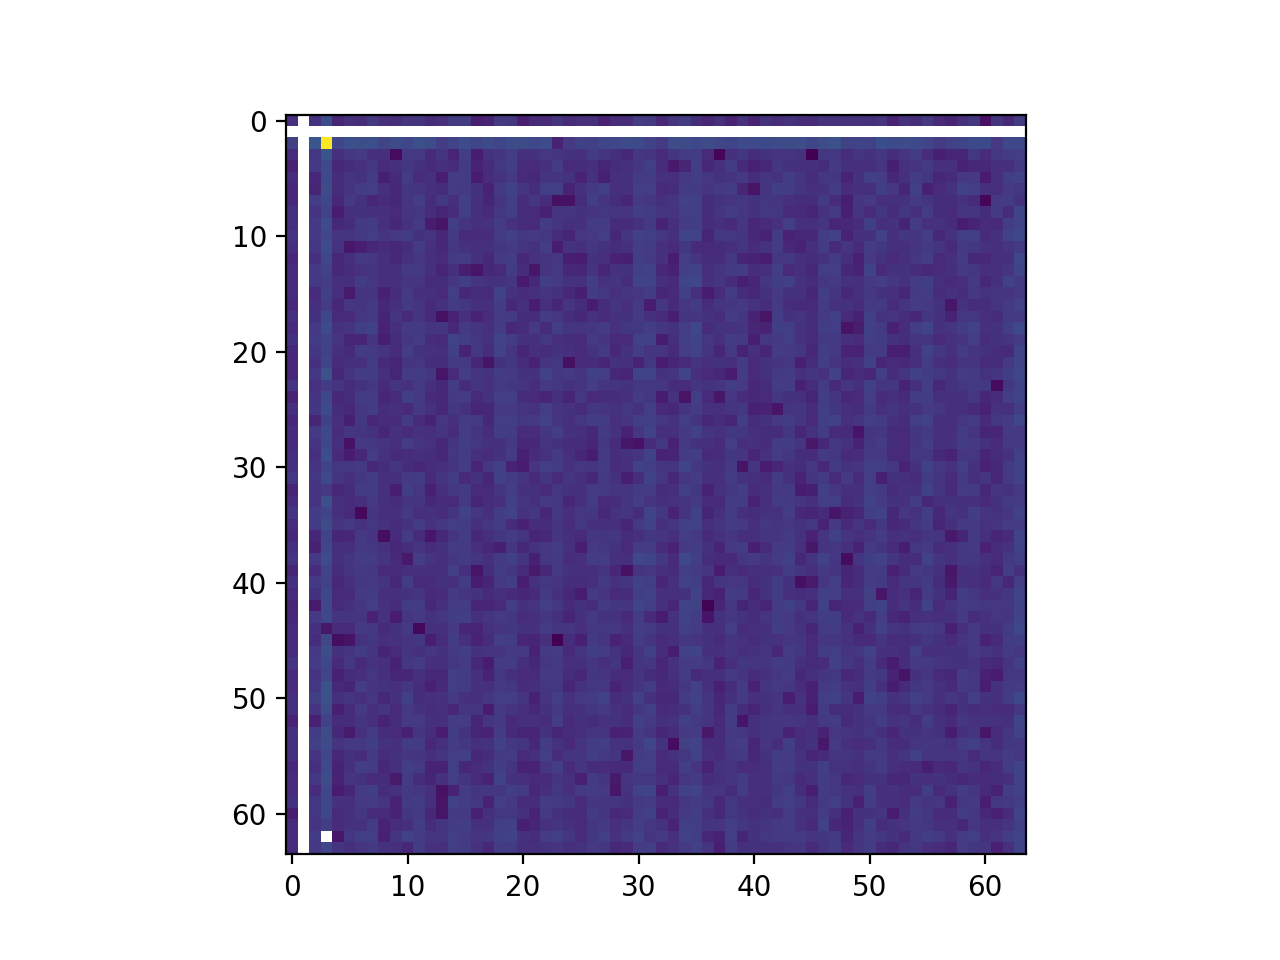

/var/folders/yl/n21qhxyn5093pv7cynvb2_7w0000gn/T/ipykernel_43550/1161546500.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(u.data.T)))


In [11]:
plt.figure()
plt.imshow(np.log(np.abs(u.data.T)))

In [12]:
u.data[3, 2]

-1.0

In [13]:
u.require_coeff_space()
u.require_grid_space()

In [15]:
u.data

array([[ 1.16000530e-17,  1.14703537e-17,  1.33715441e-17, ...,
         1.26277369e-17,  1.14199802e-17,  1.14703537e-17],
       [ 9.80171403e-02,  9.75451610e-02,  9.61337685e-02, ...,
         9.37965552e-02,  9.61337685e-02,  9.75451610e-02],
       [ 1.95090322e-01,  1.94150909e-01,  1.91341716e-01, ...,
         1.86689798e-01,  1.91341716e-01,  1.94150909e-01],
       ...,
       [-2.90284677e-01, -2.88886877e-01, -2.84706939e-01, ...,
        -2.77785117e-01, -2.84706939e-01, -2.88886877e-01],
       [-1.95090322e-01, -1.94150909e-01, -1.91341716e-01, ...,
        -1.86689798e-01, -1.91341716e-01, -1.94150909e-01],
       [-9.80171403e-02, -9.75451610e-02, -9.61337685e-02, ...,
        -9.37965552e-02, -9.61337685e-02, -9.75451610e-02]])

<IPython.core.display.Javascript object>


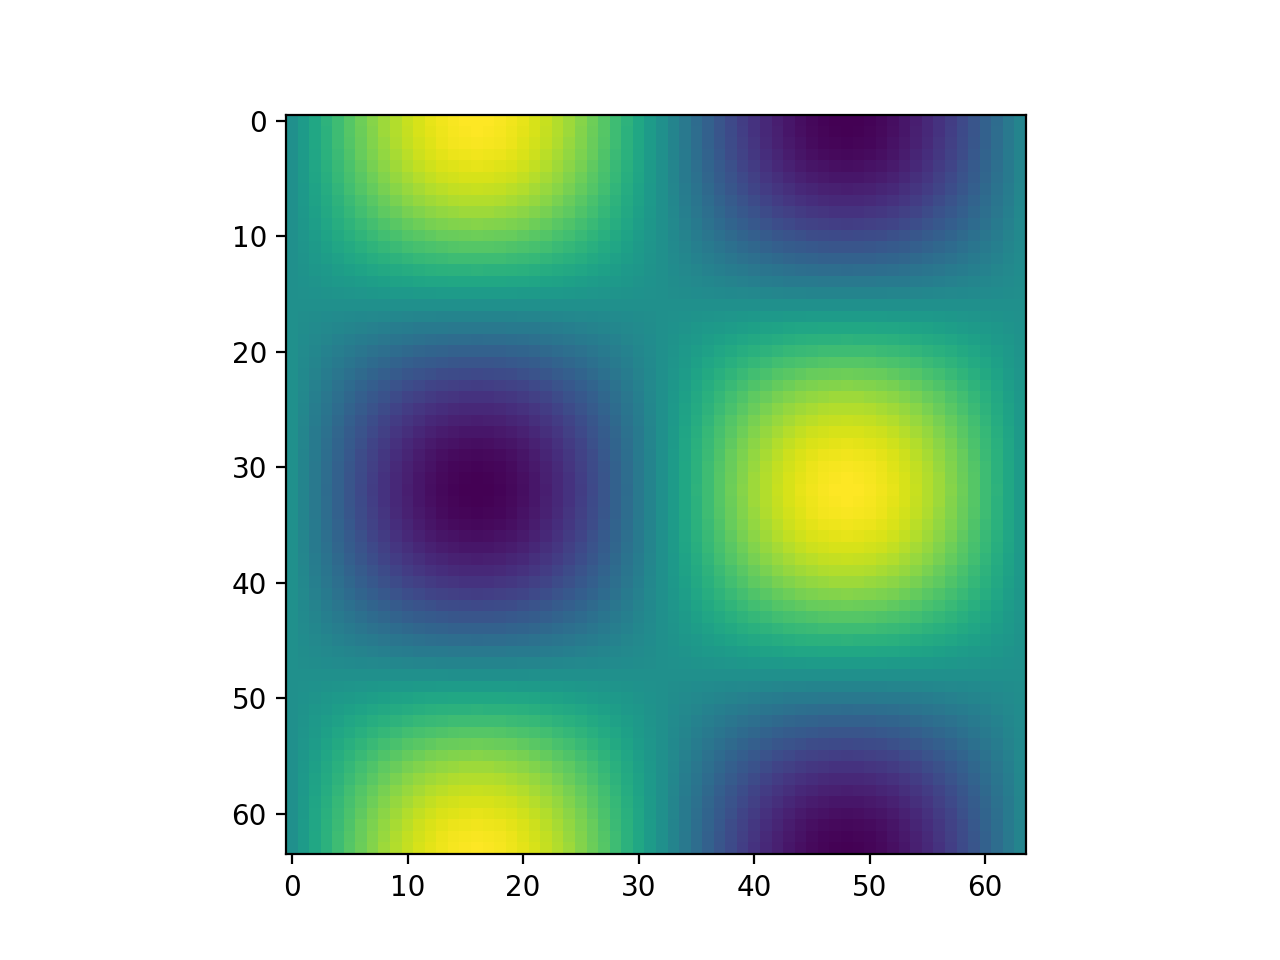

In [17]:
plt.figure()
plt.imshow(u.data.T)

## Fully Periodic BVP

Let's try solving
$$ \nabla^2 u = f(x, y).$$
For simplicity, we will take $f(x,y) = \sin(x)\cos(y)$. We'll also assume that $u$ has no mean.

In [26]:
N = 64
x_basis = spectral.Fourier(N)
y_basis = spectral.Fourier(N)
domain = spectral.Domain([x_basis, y_basis])
x, y = domain.grids()
dtype = np.complex128
u = spectral.Field(domain, dtype=dtype)

In [27]:
problem = spectral.BoundaryValueProblem(domain, [u], dtype=dtype)

Acting on a fourier series, the equation becomes
$$L u = f$$
where $L=D_y^2-k_x^2$.

In [30]:
problem.pencils[0].wavenumbers[0]

0.0

In [31]:
for p in problem.pencils:
    print(p.wavenumbers[0])

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
-32.0
-31.0
-30.0
-29.0
-28.0
-27.0
-26.0
-25.0
-24.0
-23.0
-22.0
-21.0
-20.0
-19.0
-18.0
-17.0
-16.0
-15.0
-14.0
-13.0
-12.0
-11.0
-10.0
-9.0
-8.0
-7.0
-6.0
-5.0
-4.0
-3.0
-2.0
-1.0


In [37]:
D = y_basis.derivative_matrix(dtype)
D2 = D @ D
I = sparse.identity(N)

for p in problem.pencils:
    p.L = D2 - p.wavenumbers[0]**2*I
    if p.wavenumbers[0] == 0:
        p.L[0,0] = 1

/opt/miniconda3/envs/dedalus_new/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


<IPython.core.display.Javascript object>


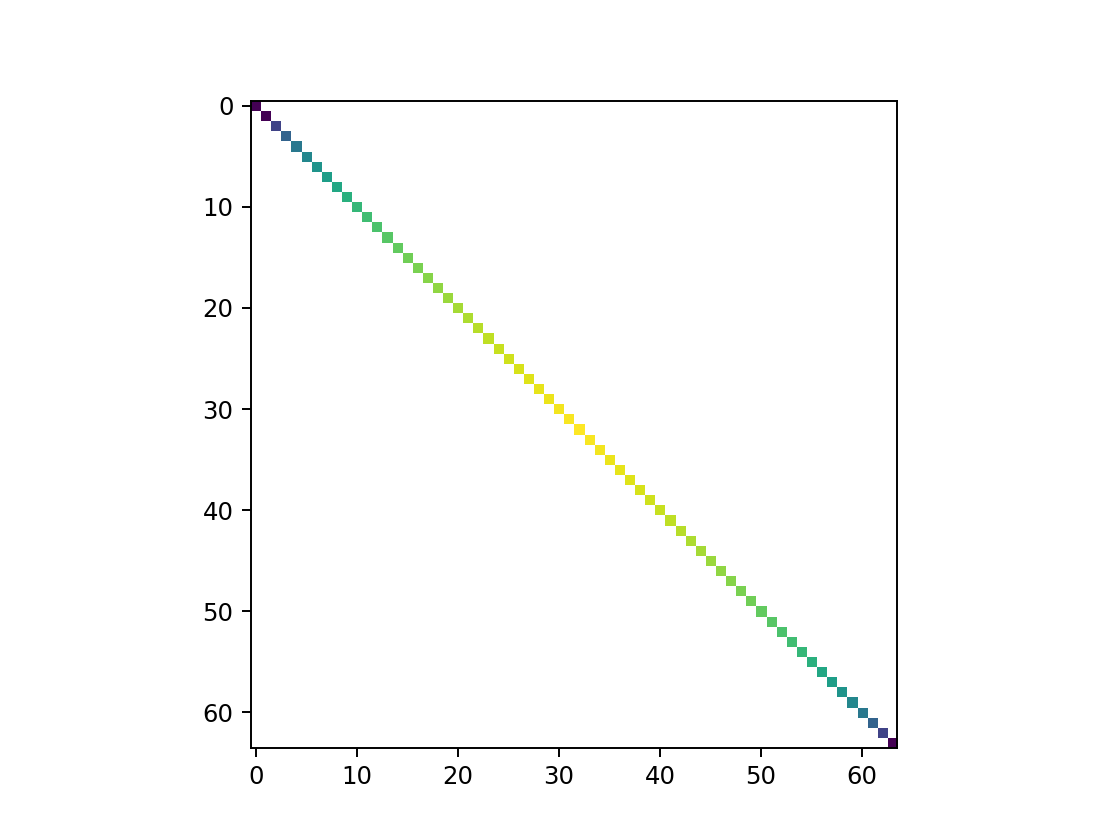

/var/folders/8j/kcmh8b0d37lgd3dff3rz5wsc0000gn/T/ipykernel_71761/1247603200.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(problem.pencils[0].L.A)))


In [38]:
plt.figure()
plt.imshow(np.log(np.abs(problem.pencils[0].L.A)))

<IPython.core.display.Javascript object>


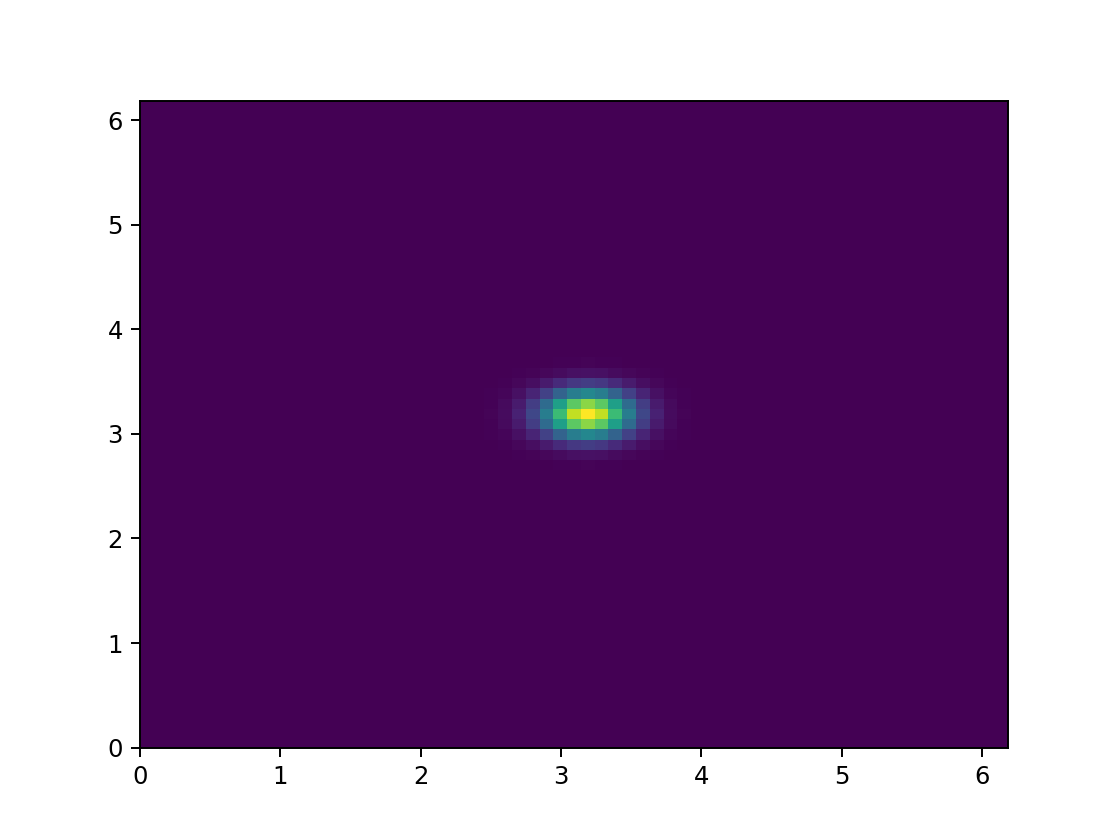

/var/folders/8j/kcmh8b0d37lgd3dff3rz5wsc0000gn/T/ipykernel_71761/3466292158.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xm, ym, f.data.T)


In [45]:
f = spectral.Field(domain, dtype=dtype)
f.require_grid_space()

f.data = np.exp(-(x-np.pi)**2*10 - (y-np.pi)**2*20)

xm, ym = np.meshgrid(x.ravel(), y.ravel())
plt.figure()
plt.pcolormesh(xm, ym, f.data.T)
f.require_coeff_space()
F = spectral.StateVector([f], problem)

In [46]:
problem.solve(F)

<IPython.core.display.Javascript object>


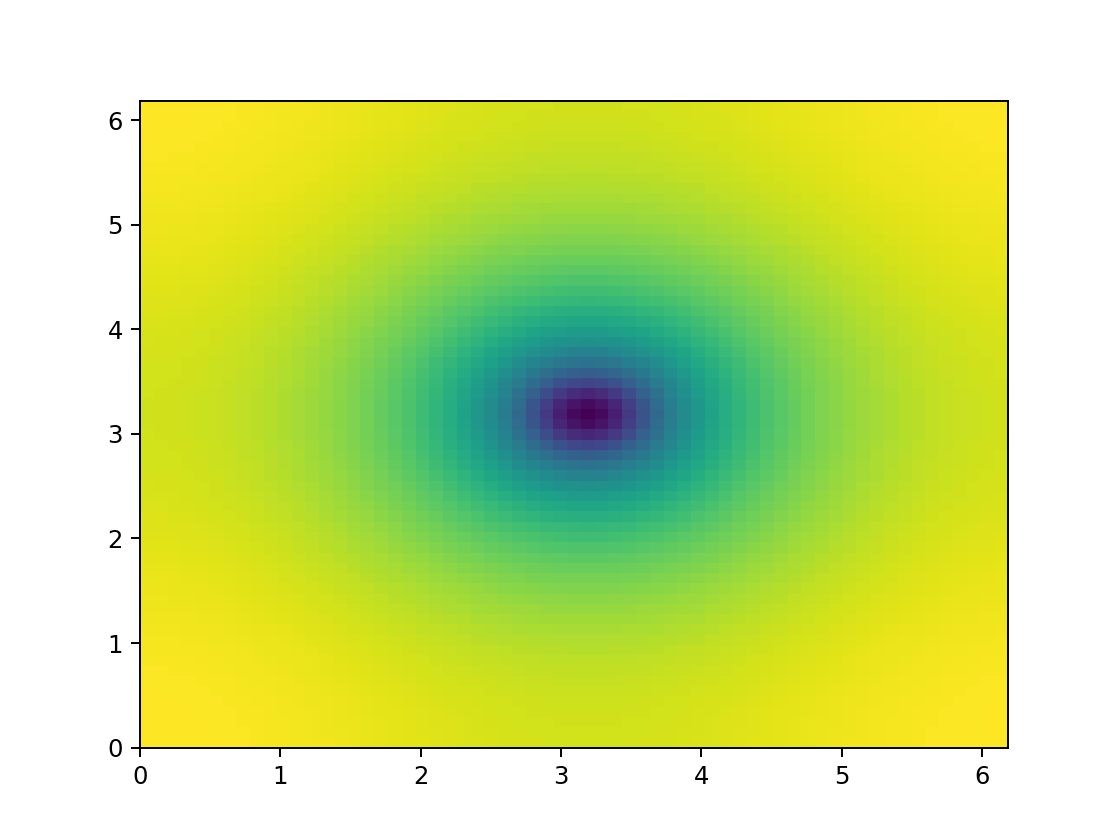

/var/folders/8j/kcmh8b0d37lgd3dff3rz5wsc0000gn/T/ipykernel_71761/1428581634.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xm, ym, u.data.real.T)


In [47]:
plt.figure()
u.require_grid_space()
plt.pcolormesh(xm, ym, u.data.real.T)

In [44]:
np.allclose(u.data, -1/2*np.sin(x)*np.cos(y))

True